In [2]:
from google.cloud import speech

In [3]:
from google.cloud import language

In [4]:
import pprint

In [5]:
import matplotlib.pyplot as plt

In [6]:
from math import ceil

In [7]:
speech_client = speech.SpeechClient()

In [8]:
lang_client = language.LanguageServiceClient()

In [9]:
bucket_address = "gs://samples-112/samples/samp2/"
audio_samples = ['cust_trimmed_000.flac',
#                  'cust_trimmed_001.flac',
#                  'cust_trimmed_002.flac',
#                  'cust_trimmed_003.flac',
#                  'cust_trimmed_004.flac',
                ]

In [26]:
def get_operation(uri):
    audio=speech.types.RecognitionAudio(
            uri=uri
        )

    config=speech.types.RecognitionConfig(
            encoding='FLAC',
            language_code='en-US'
        )
    operation = speech_client.long_running_recognize(config, audio)
    return operation

In [11]:
def analyze_text(text):
    document = language.types.Document(
        content=text,
        language='en',
        type='PLAIN_TEXT',
    )

    response = lang_client.analyze_sentiment(
        document=document,
        encoding_type='UTF32',
    )
    return response

In [12]:
operations = []
for index,sample in enumerate(audio_samples):
    uri = bucket_address+sample
    operations.append([index,get_operation(uri)])

In [13]:
responses = []
transcript = []
x_counter_scatter_pos = 0
x_counter_scatter_neg = 0
x_counter_sentiments = 0
my_dpi=60
# plt.figure(figsize=(1280/my_dpi, 720/my_dpi), dpi=my_dpi)
# plt.plot(list(range(len(sentiments))),[0]*len(sentiments),color='grey')
for el in operations:
    print('Waiting for operation to complete...')
    response = el[1].result(timeout=90)
    responses.append(response)
    transcript_operation = []
    for result in response.results:
        transcript.append(result.alternatives[0].transcript)
#         transcript_operation.append(result.alternatives[0].transcript)
#     num_lines = len(transcript_operation)
#     one_time = 30
#     divides = ceil(num_lines/one_time)
#     portion = num_lines/divides
#     sentiments = []
#     print("divides -> "+str(divides))
#     print("portion -> "+str(portion))
#     for i in range(divides):
#         start = ceil(i*portion)
#         end = ceil(start+portion)
#         print(start,end)
#         text = "".join(transcript_operation[start:end])
#         response = analyze_text(text)
#     for sentence in response.sentences:
#         sentiments.append(sentence.sentiment.score*sentence.sentiment.magnitude)
#     positive_sentiments = []
#     positive_sentiments_counter = []
#     negative_sentiments = []
#     negative_sentiments_counter = []
#     for counter,sentiment in enumerate(sentiments):
#         if sentiment>=0:
#             positive_sentiments.append(sentiment)
#             positive_sentiments_counter.append(x_counter_scatter_pos+counter)
#         else:
#             negative_sentiments.append(sentiment)
#             negative_sentiments_counter.append(x_counter_scatter_neg+counter)

#     plt.scatter(positive_sentiments_counter,positive_sentiments,color='g')
#     plt.scatter(negative_sentiments_counter,negative_sentiments,color='r')
#     plt.plot(list(range(x_counter_sentiments,len(sentiments)+x_counter_sentiments)),sentiments,color='black')
#     # plt.savefig('sample1.png')
#     plt.show()
#     x_counter_scatter_pos+=len(positive_sentiments)
#     x_counter_scatter_neg+=len(negative_sentiments)
#     x_counter_sentiments+=len(sentiments)
            
#     for result in response.results:
#         print(el[0])
#         print('Transcript: {}'.format(result.alternatives[0].transcript))
#         print('Confidence: {}'.format(result.alternatives[0].confidence))

Waiting for operation to complete...


In [14]:
num_lines = len(transcript)

In [15]:
one_time = 30
divides = ceil(num_lines/one_time)
portion = num_lines/divides
sentiments = []
print("divides -> "+str(divides))
print("portion -> "+str(portion))

divides -> 1
portion -> 9.0


In [16]:
for i in range(divides):
    start = ceil(i*portion)
    end = ceil(start+portion)
    print(start,end)
    text = "".join(transcript[start:end])
    response = analyze_text(text)
    for sentence in response.sentences:
        sentiments.append(sentence.sentiment.score*sentence.sentiment.magnitude)

0 9


In [17]:
positive_sentiments = []
positive_sentiments_counter = []
negative_sentiments = []
negative_sentiments_counter = []
for counter,sentiment in enumerate(sentiments):
    if sentiment>=0:
        positive_sentiments.append(sentiment)
        positive_sentiments_counter.append(counter)
    else:
        negative_sentiments.append(sentiment)
        negative_sentiments_counter.append(counter)

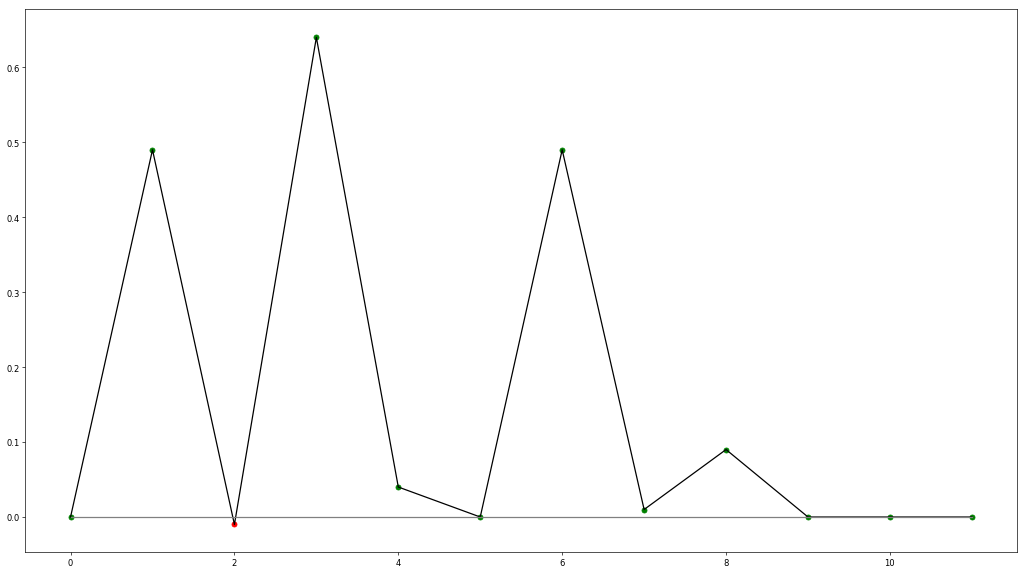

In [18]:
my_dpi=60
plt.figure(figsize=(1280/my_dpi, 720/my_dpi), dpi=my_dpi)
plt.scatter(positive_sentiments_counter,positive_sentiments,color='g')
plt.scatter(negative_sentiments_counter,negative_sentiments,color='r')
plt.plot(list(range(len(sentiments))),sentiments,color='black')
plt.plot(list(range(len(sentiments))),[0]*len(sentiments),color='grey')
# plt.savefig('sample1.png')
plt.show()

In [23]:
!jupyter nbconvert --to python pipeline.ipynb --output pipe1.py --no-prompt

[NbConvertApp] Converting notebook pipeline.ipynb to python
[NbConvertApp] Writing 5070 bytes to pipe1.py


In [24]:
def audio_to_transcript(file_url_list):
    """
    Returns a transcript(type:list) for a list of audio files passed in file_url_list(type:list)
    """
    speech_client = speech.SpeechClient()
    lang_client = language.LanguageServiceClient()
    bucket_address = "gs://samples-112/samples/samp2/"
    audio_samples = file_url_list
    operations = []
    for index,sample in enumerate(audio_samples):
        uri = bucket_address+sample
        operations.append([index,get_operation(uri)])
    responses = []
    transcript = []

    for el in operations:
        print('Waiting for operation to complete...')
        response = el[1].result(timeout=90)
        responses.append(response)
        transcript_operation = []
        for result in response.results:
            transcript.append(result.alternatives[0].transcript)
    return transcript

In [27]:
t = audio_to_transcript(['cust_trimmed_000.flac',])

Waiting for operation to complete...


In [28]:
print(type(t))

<class 'list'>


In [32]:
for el in t:
    print(el)

You have reached evans restaurant assisting you crazy day. It's beautiful. This call is being recalled the issue is.
 bar owner and handling
 Good morning, Michael. Hey for her birthday. Okay? Happy to assist you your your first in your last.
 And l.a.
 Go ahead and press option here right now.
 The verify your email address please.
 How about your shipping address?
 Avenue address
 Creek


In [57]:
import json
def transcript_to_sentiment(transcript):
    """
    Returns 
    """
    num_lines = len(transcript)
    one_time = 30
    divides = ceil(num_lines/one_time)
    portion = num_lines/divides
    sentiments = []
    print("divides -> "+str(divides))
    print("portion -> "+str(portion))
    for i in range(divides):
        start = ceil(i*portion)
        end = ceil(start+portion)
        print(start,end)
        text = "".join(transcript[start:end])
        response = analyze_text(text)
        return response
# #         print(type(json.dumps(response.sentences)))
#         pprint.pprint(response)
#         for sentence in response.sentences:
# #             pprint.pprint(response)
#             sentiments.append(sentence.sentiment.score*sentence.sentiment.magnitude)
#     return sentiments

In [58]:
s = transcript_to_sentiment(t)

divides -> 1
portion -> 9.0
0 9


In [69]:
dir(s)
# ss = s.SerializeToString()

['ByteSize',
 'Clear',
 'ClearExtension',
 'ClearField',
 'CopyFrom',
 'DESCRIPTOR',
 'DOCUMENT_SENTIMENT_FIELD_NUMBER',
 'DiscardUnknownFields',
 'FindInitializationErrors',
 'FromString',
 'HasExtension',
 'HasField',
 'IsInitialized',
 'LANGUAGE_FIELD_NUMBER',
 'ListFields',
 'MergeFrom',
 'MergeFromString',
 'ParseFromString',
 'RegisterExtension',
 'SENTENCES_FIELD_NUMBER',
 'SerializePartialToString',
 'SerializeToString',
 'SetInParent',
 'WhichOneof',
 '_InternalParse',
 '_InternalSerialize',
 '_Modified',
 '_SetListener',
 '_UpdateOneofState',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_

In [76]:
# d = json.loads(ss.decode('utf-8'))
# pprint.pprint(d)
import base64
ss1 = base64.decodebytes(ss)
# ss.decode('utf8')
print(ss1)

b",\xb7\xa7b\x8b\xa1j\xf7\xaby\xa7!y\xd7\xafj{+z\xcbZ\xba\xb6\xa7\xb5\xab,\x8a\xcbb\x9e\x0c\xa8\xb9\xca\xda\xcf'Z\xc8\x8blm\xe6\xae\xb6'\xee\x97}\xf7\xdf}\xd3\x86+\x1cjYb\xb1\xb7\xa2\x9e\n\xdeq\xa9ey\xdbaz+,\xb9\xe8\xac+V\xda\xae\x8c'z\xb6\xa7v\x16\xa7vX\xa7\x80j(vj+\x9e)\xe02'!i\xe9n,\xb1\xde\xc9\xfa+\x85\xea\xdb\x8a\xbbau\xac\x8b,\xe9\x1a\xc8>\xb5\x1d\xaai\xca\xda\x1a\xb2\xc8\xac\xb7*.\xca\x8b\xab\xca\x8b\xab~*\xec\xb6)\xf2\xa2\xea\xe5j\xcbw\xdf}\xf7\xdc\t\xdd\x95"


In [96]:
# print((s.sentences)[1])
# print(s)
data = []
for el in s.sentences:
    data.append({'text':el.text.content,'sentiment':{'magnitude':el.sentiment.magnitude,'score':el.sentiment.score}})
pprint.pprint(data)

[{'sentiment': {'magnitude': 0.0, 'score': 0.0},
  'text': 'You have reached evans restaurant assisting you crazy day.'},
 {'sentiment': {'magnitude': 0.699999988079071, 'score': 0.699999988079071},
  'text': "It's beautiful."},
 {'sentiment': {'magnitude': 0.10000000149011612,
                'score': -0.10000000149011612},
  'text': 'This call is being recalled the issue is.'},
 {'sentiment': {'magnitude': 0.800000011920929, 'score': 0.800000011920929},
  'text': 'bar owner and handling Good morning, Michael.'},
 {'sentiment': {'magnitude': 0.20000000298023224, 'score': 0.20000000298023224},
  'text': 'Hey for her birthday.'},
 {'sentiment': {'magnitude': 0.0, 'score': 0.0}, 'text': 'Okay?'},
 {'sentiment': {'magnitude': 0.699999988079071, 'score': 0.699999988079071},
  'text': 'Happy to assist you your your first in your last.'},
 {'sentiment': {'magnitude': 0.10000000149011612, 'score': 0.10000000149011612},
  'text': 'And l.a.'},
 {'sentiment': {'magnitude': 0.30000001192092896, '

In [79]:
print(type(s.SerializePartialToString()))

<class 'bytes'>


In [38]:
for el in s:
    print(el)

0.0
0.4899999833106996
-0.010000000298023226
0.6400000190734865
0.040000001192092904
0.0
0.4899999833106996
0.010000000298023226
0.09000000715255752
0.0
0.0
0.0
